In [ ]:
pip install seaborn
pip install scipy
pip install plotly
pip install pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

Load_data

In [2]:
df = pd.read_csv(r"C:\Users\shank\Desktop\github_data\Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#from this above dataset we can cleary see Life expectancy as target column and rest all independant column

sanity check of the data

In [3]:
df.shape

(2938, 22)

In [4]:
df.info()
#by this dataset we can see some missing values in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
#finidng missing values

df.isnull().sum()

#missing values columns- Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI, Polio,Total expenditure,Diphtheria,GDP,population,thinness  1-19 years,thinness 5-9 years,Income composition of resources,Schooling

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#missing value percentage

(df.isnull().sum()/df.shape[0])*100 #if the missing value percentage above 50% we can consider droping that column

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
#checking duplicates
df.duplicated().sum() #it will check the entire row, if entire row is repeated then it will give true as output else false

#here in this df we dont have any duplicate values

0

In [8]:
df.duplicated().unique()
#by this we can understand there is no duplicate values

array([False])

In [9]:
#finding garbage values -- this is mostly in object dtype column like some unwanted alphanumeric values

for i in df.select_dtypes(include="object").columns:
    print(i)
    print(df[i].value_counts())

Country
Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Status
Status
Developing    2426
Developed      512
Name: count, dtype: int64


In [10]:
#spelling check for object datatype columns befor encoding
for i in df.select_dtypes(include="object").columns:
    print(df[i].unique(),df[i].nunique())
    print("****"*10)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

EDA

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
pd.set_option("display.max_columns", None)

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
#missing value treatments
#1st dropping or filling the miss value its the scope of bussiness/client

#we can fill missing value with mean,median,mode,max or min 
#if the missing value is in categorical column we can use mode to fill or if its in contious then we can go with mean or median

#here i fill some of the missing columns by mean
for i in ["Life expectancy ","Adult Mortality","Alcohol","Hepatitis B"," BMI ","Polio","Total expenditure"]:
    df[i].fillna(value=df[i].mean(),inplace = True)

#here i fill some of the missing columns by median
for i in ["Diphtheria ","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]:
    df[i].fillna(value=df[i].median(),inplace = True)

In [14]:
#now we can recheck for the missing values

df.isnull().sum() #now we dont have any missing values

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [19]:
#no duplicates value here

df.duplicated().sum()

0

In [20]:
#speliing  check and encoding for object datatype

df["Country"].unique(), df["Country"].nunique()

(array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
        'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
        'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
        'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
        'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
        'Geo

In [135]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
#encoding using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["Country"] = encoder.fit_transform(df[["Country"]])


In [16]:
df["Status"].unique(), df["Status"].nunique()

(array(['Developing', 'Developed'], dtype=object), 2)

In [17]:
df["Status"] = encoder.fit_transform(df[["Status"]])

In [18]:
df["Country"].unique(), df["Status"].unique()

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  44.,  27.,  28.,  29.,  30.,  31.,
         32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
         43.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [19]:
df.info() #now we transformed every column into numerical datatypes format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   float64
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [26]:
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,2015,1.0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014,1.0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013,1.0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012,1.0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011,1.0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
#Descriptive statistics - it will show for only numerical columns

df.describe() 

#by this we can understand how the dataset is and how is spearding 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,56.244904,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,93.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


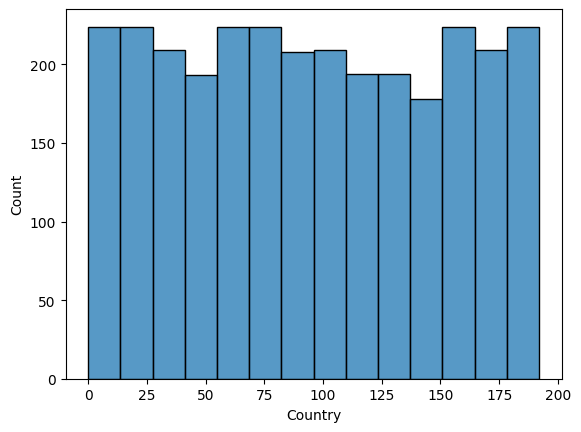

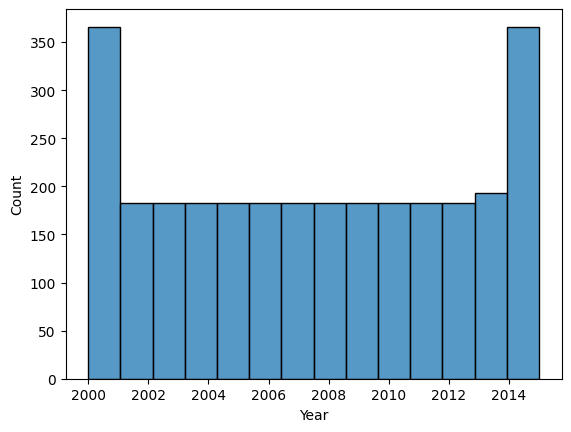

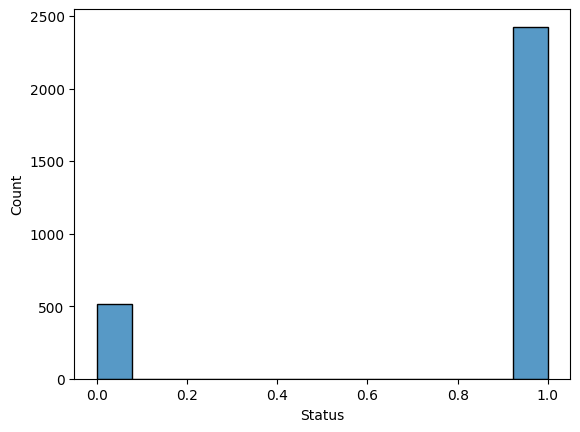

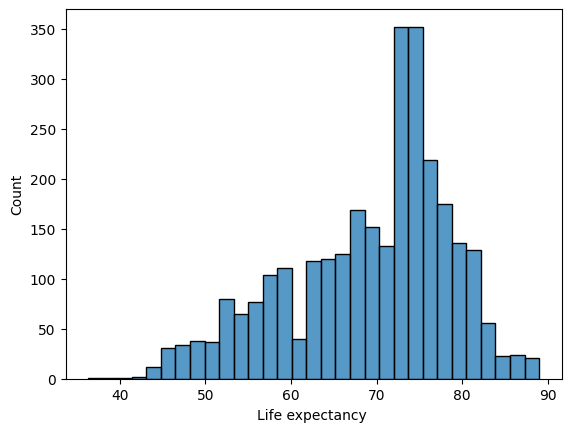

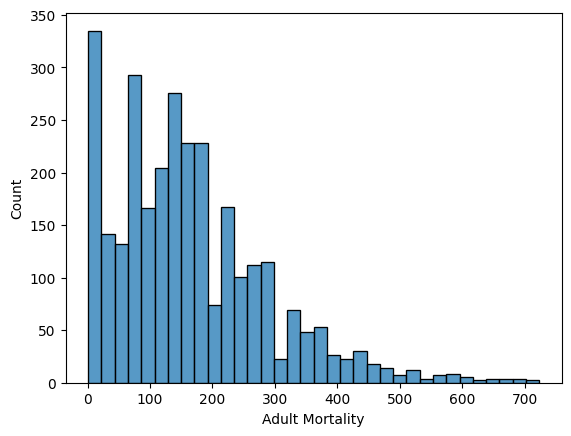

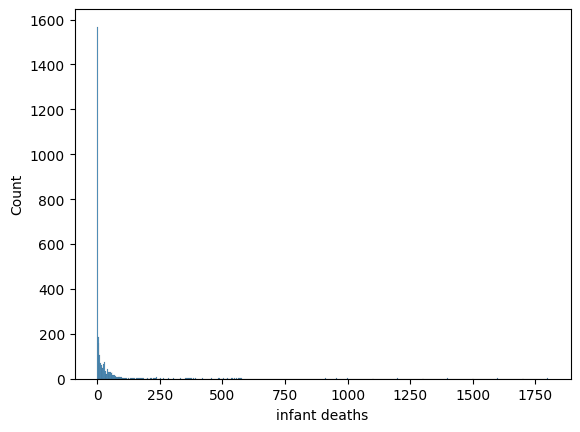

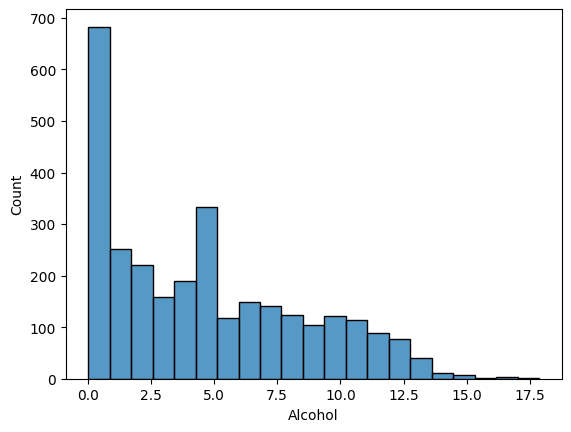

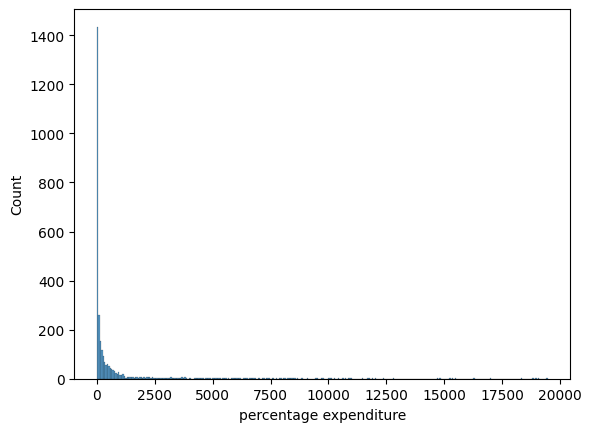

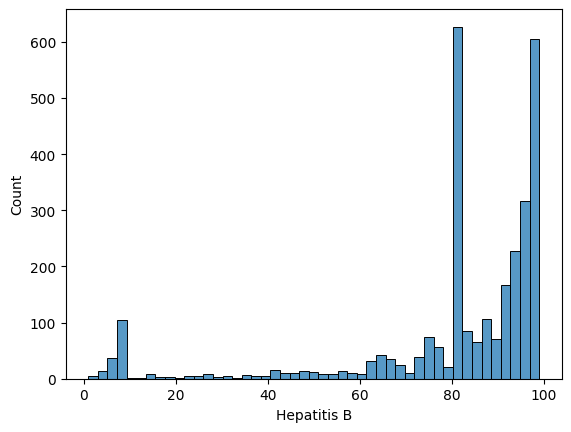

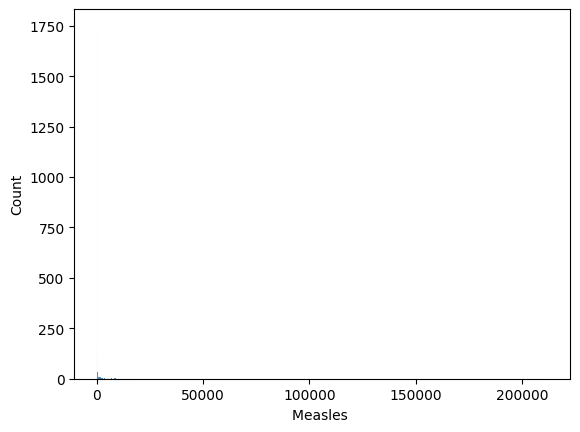

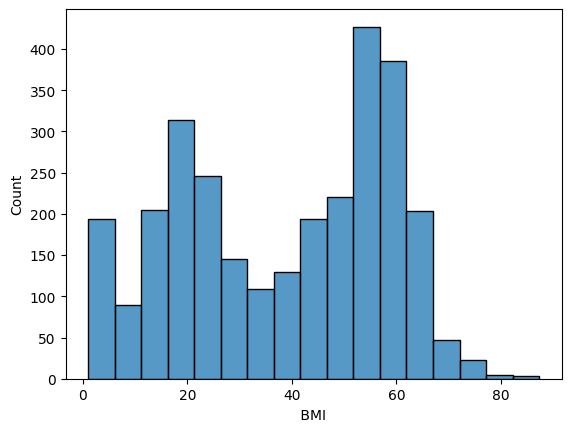

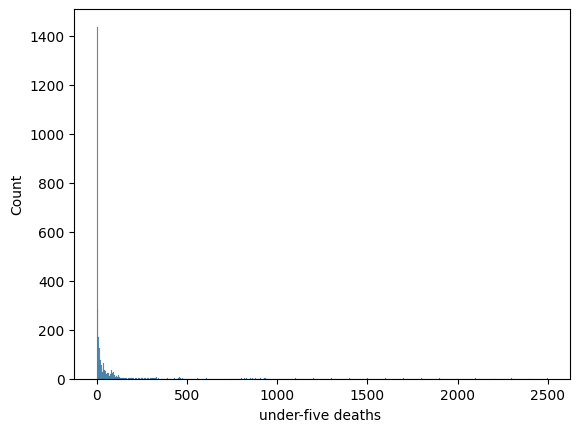

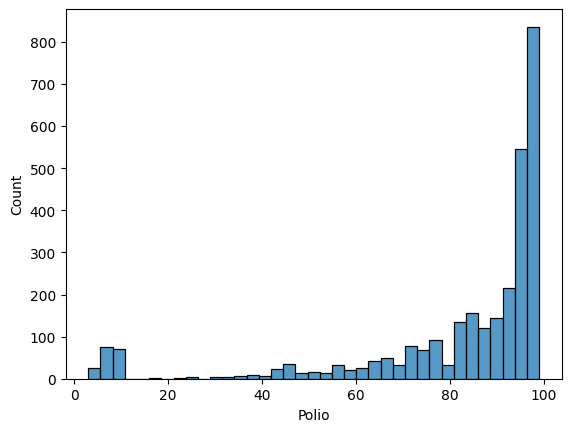

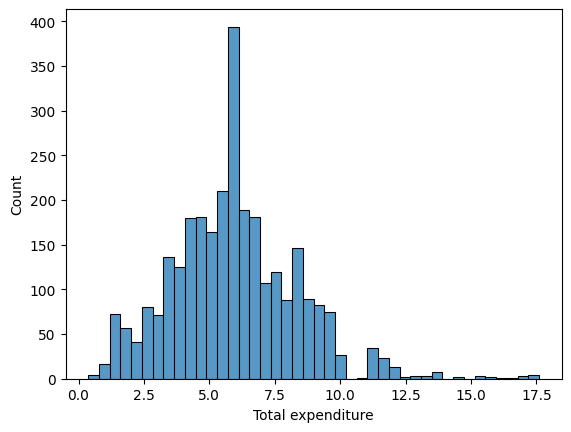

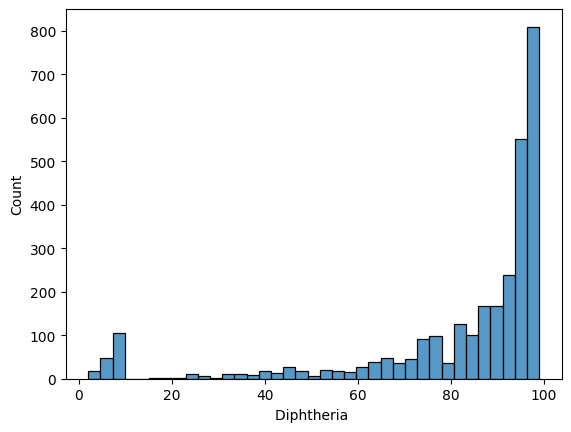

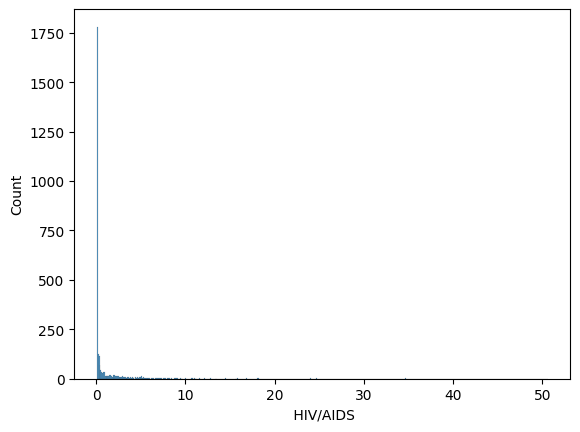

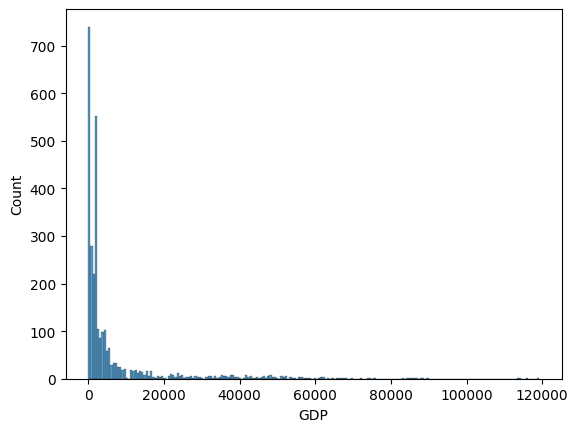

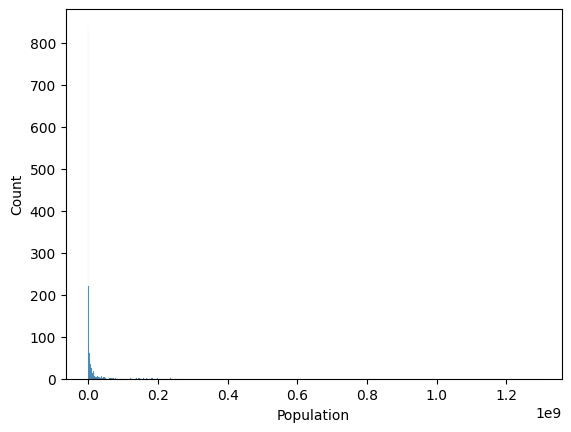

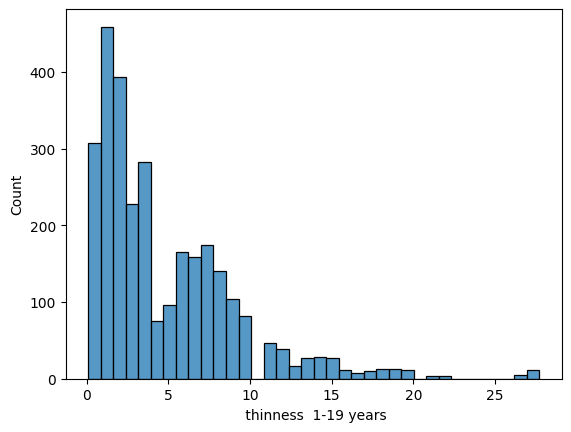

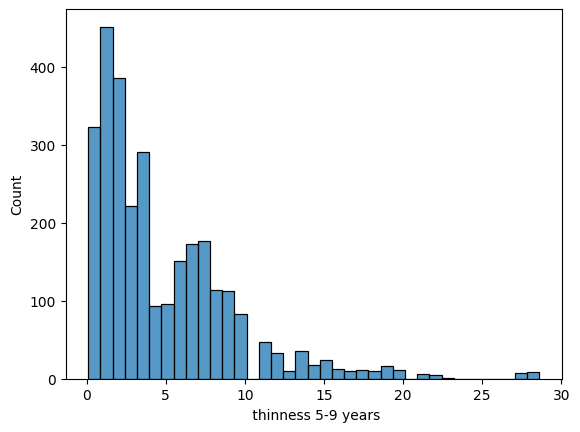

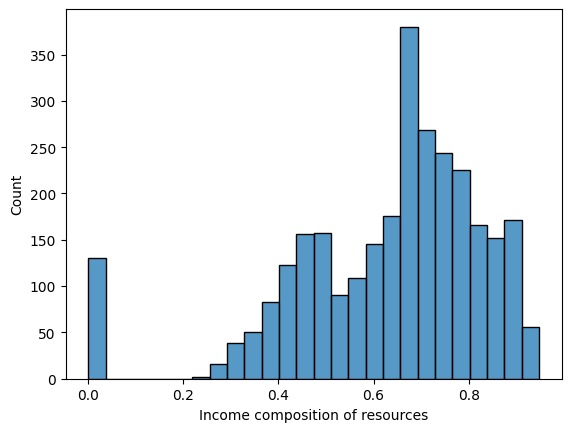

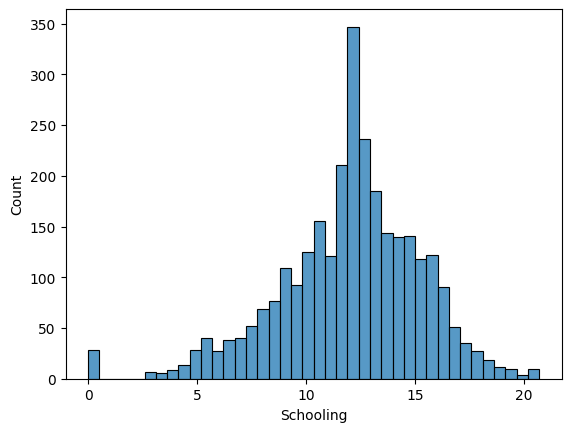

In [28]:
#histogram - to understand the distibution - frequency plot
#only for numerical columns

for i in df.columns:
    sns.histplot(data = df , x = i)
    plt.show()

In [27]:
#from this above plotting we can see how is each column spreading , here some of the columns having skewness we have to check that

Outliers detection

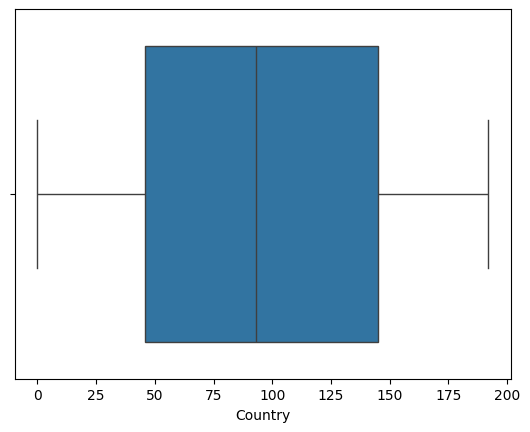

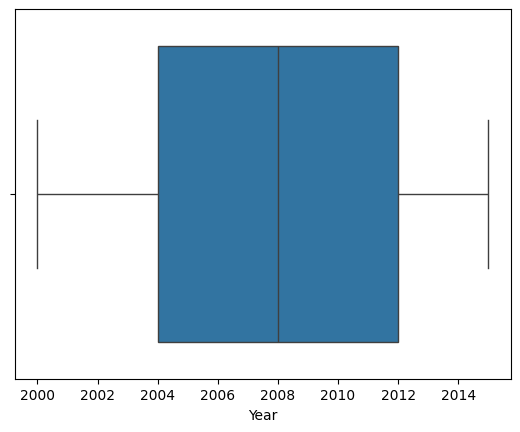

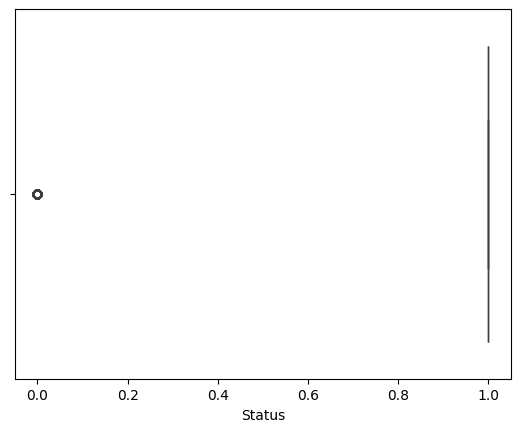

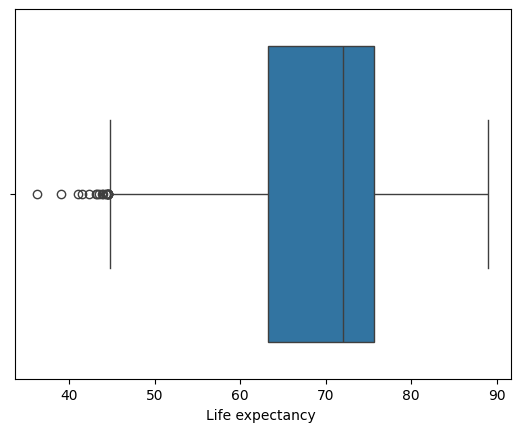

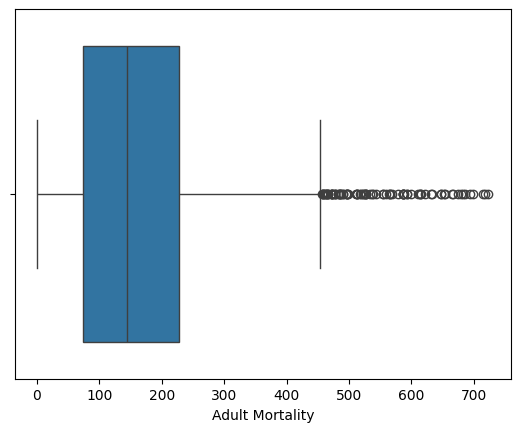

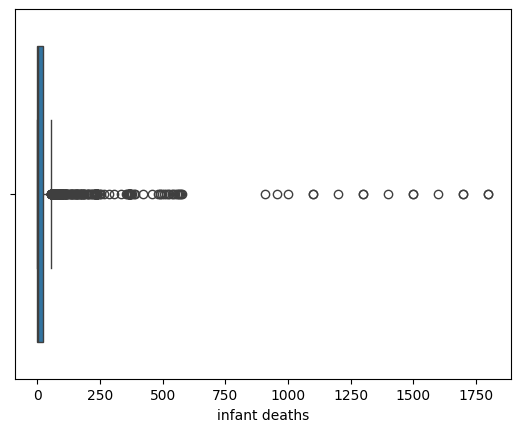

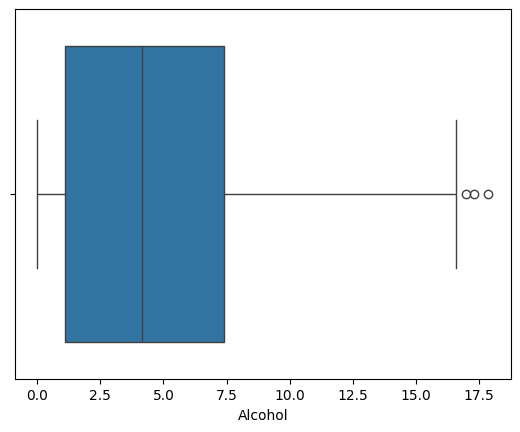

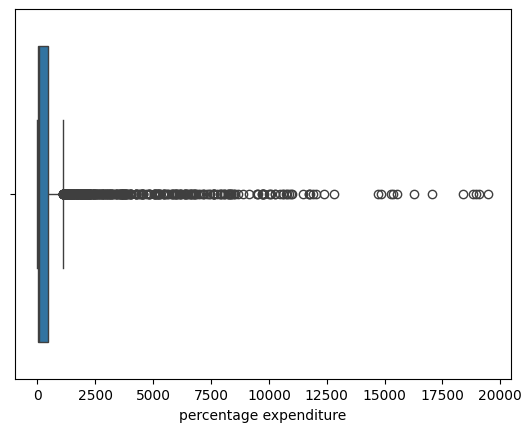

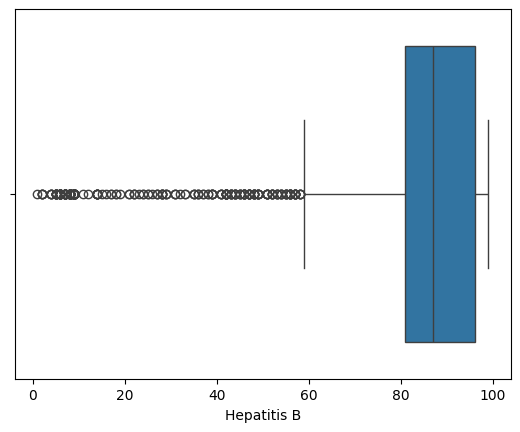

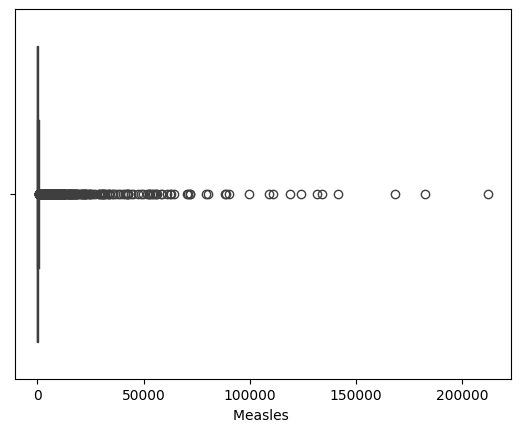

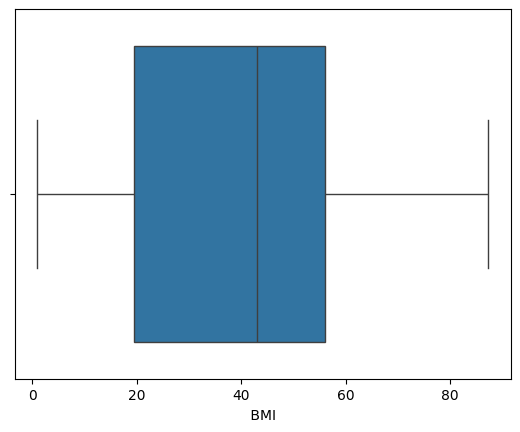

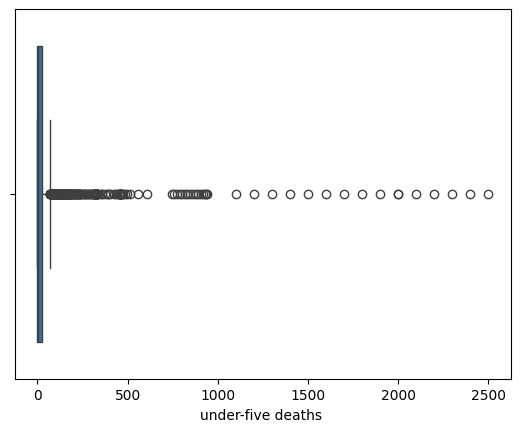

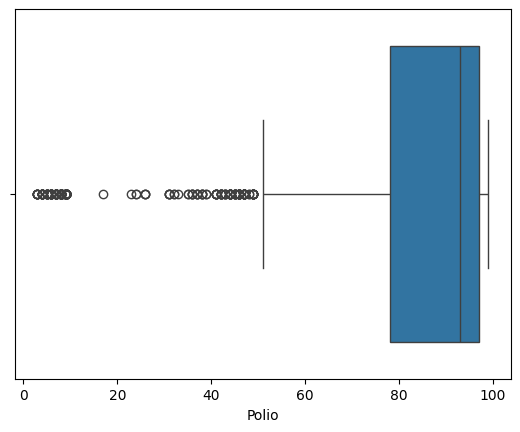

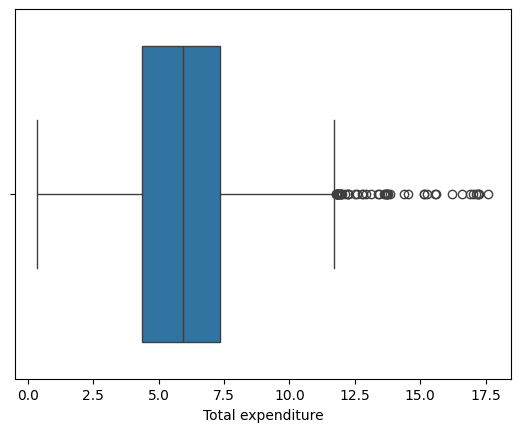

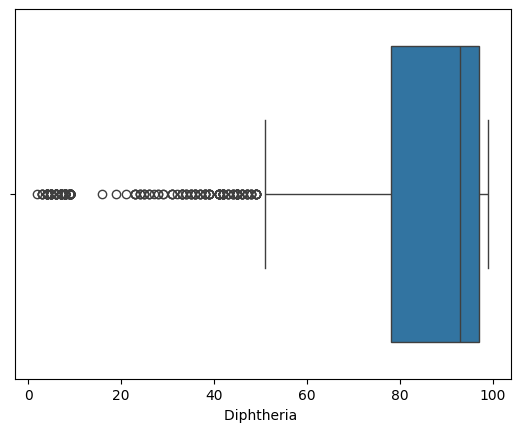

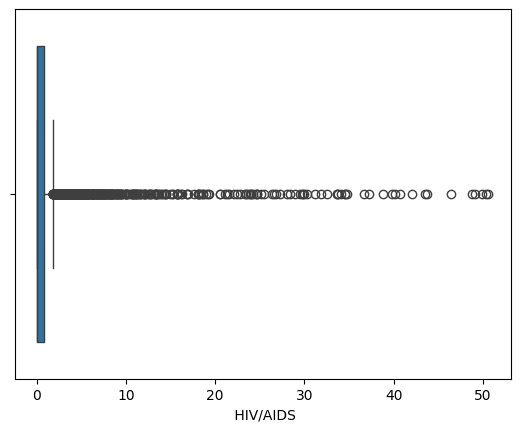

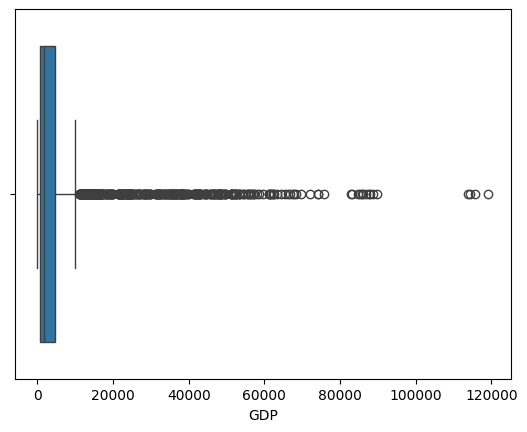

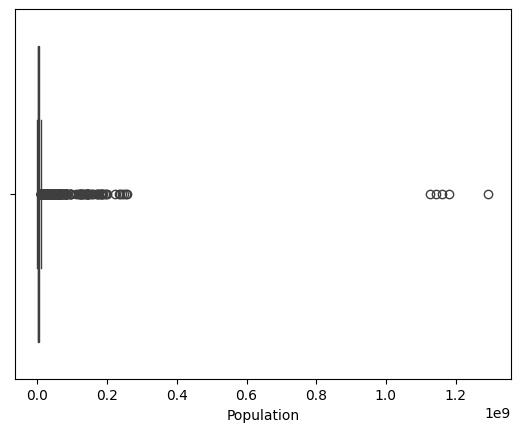

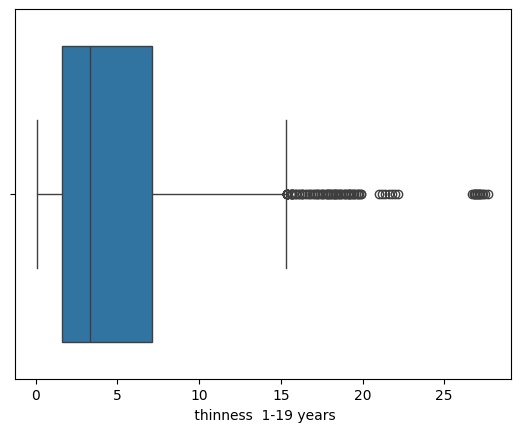

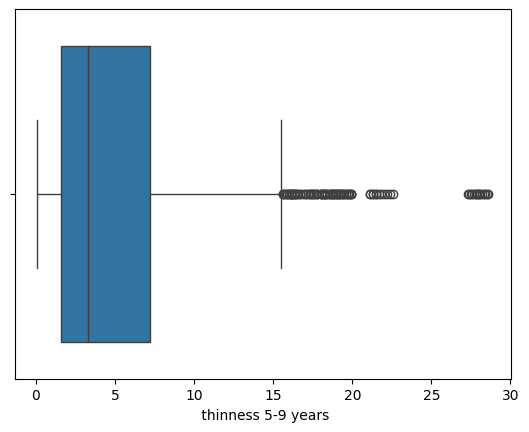

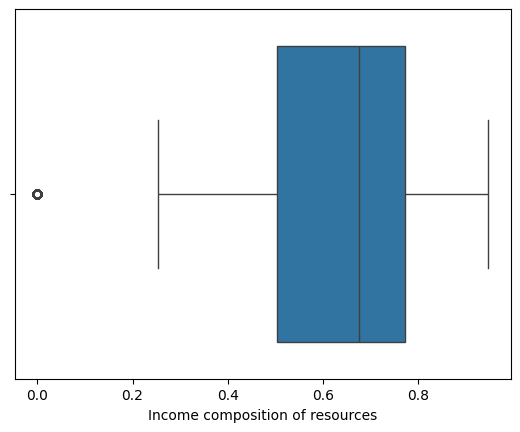

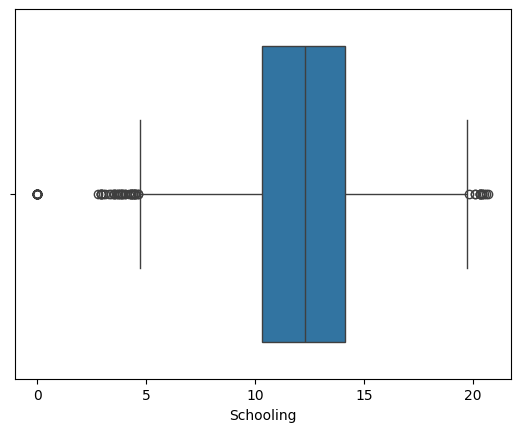

In [20]:
#boxplot for outliers

for i in df.columns:
    sns.boxplot(data=df, x = i)
    plt.show()

In [29]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,2015,1.0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014,1.0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013,1.0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012,1.0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011,1.0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
#ther is outliers in some columns

def outlier(col):
    q1,q3 =np.percentile(col,[25,75])
    iqr = q3-q1
    l_b = q1 - 1.5*iqr
    u_b = q3 + 1.5*iqr
    return l_b, u_b

#now changing outliers for some of the affected columns and i am not going to remove the column

In [32]:
import plotly.express as px

In [33]:
px.box(df,y = "Adult Mortality", points="all")

In [22]:
#adult mortality column
l_b , u_b = outlier(df["Adult Mortality"])

In [35]:
l_b

-155.5

In [23]:
# Replace outliers with the median
median = df['Adult Mortality'].median()
df['Adult Mortality'] = np.where(df['Adult Mortality'] > u_b, median, df['Adult Mortality'])


In [37]:
px.box(df,y = "Adult Mortality", points="all")

In [38]:
#like that we can handle outliers

for i in df.columns:
    fig = px.box(df,y = i, points="all")
    fig.show()

In [38]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
#now i am fixing outliers for some of the columns
for i in ["Alcohol","percentage expenditure","Hepatitis B","Measles ","Total expenditure","Diphtheria "," thinness  1-19 years"]:
    l_b,u_b =outlier(df[i])
    median = df[i].median()
    df[i] = np.where(df[i] <  l_b, l_b, df[i])

    df[i] = np.where(df[i] > u_b, u_b, df[i])

In [25]:
for i in ["Alcohol","percentage expenditure","Hepatitis B","Measles ","Total expenditure","Diphtheria "," thinness  1-19 years"]:
    fig = px.box(df,y = i,points="all")
    fig.show()

skewness and kurtosis

In [26]:
from scipy.stats import norm

In [27]:
import warnings
warnings.filterwarnings("ignore")

Country 0.03266299986942194


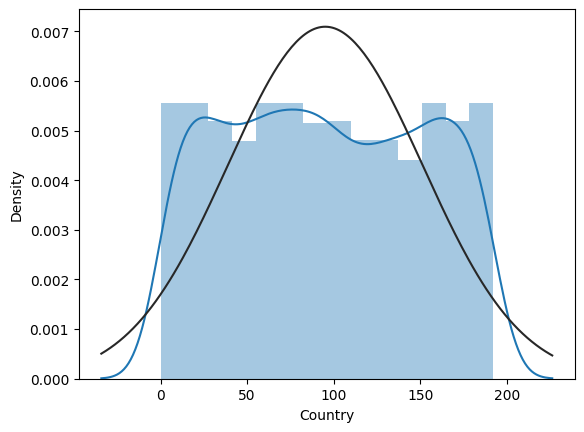

Year -0.0064090273593942005


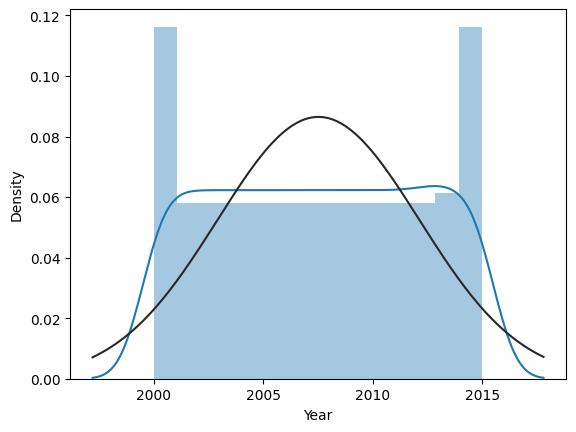

Status -1.7182382093288593


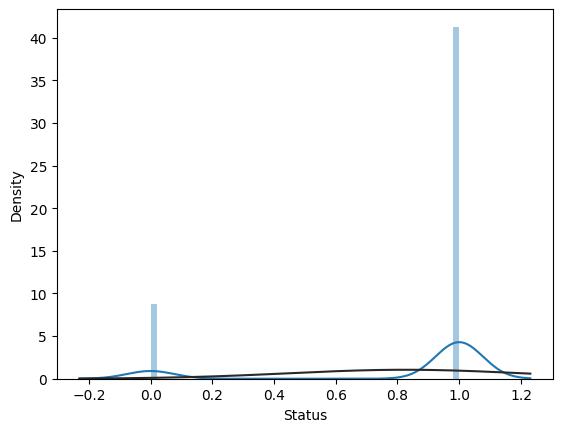

Life expectancy  -0.6396932035944191


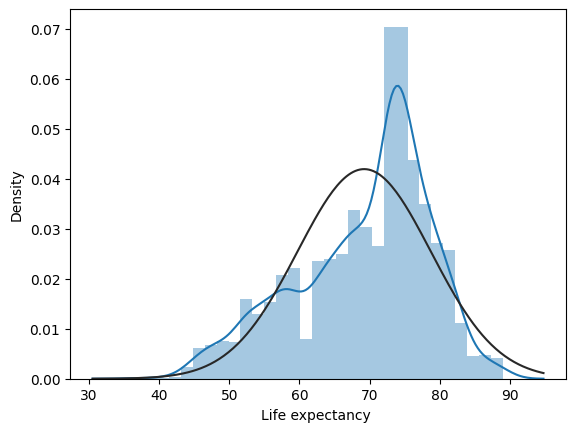

Adult Mortality 0.6621190763776083


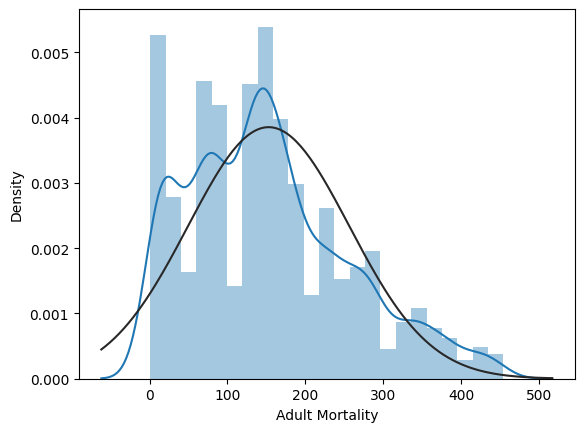

infant deaths 9.786962950426057


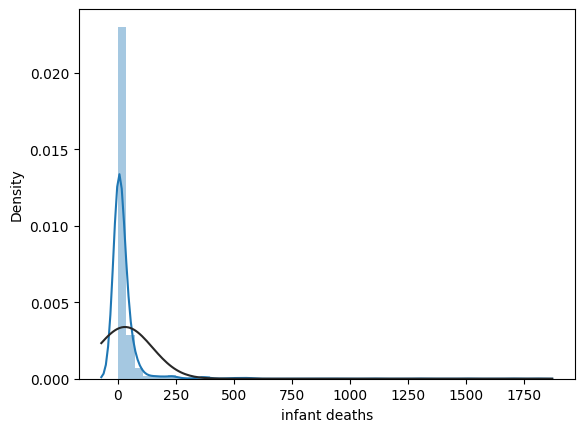

Alcohol 0.6067945339350774


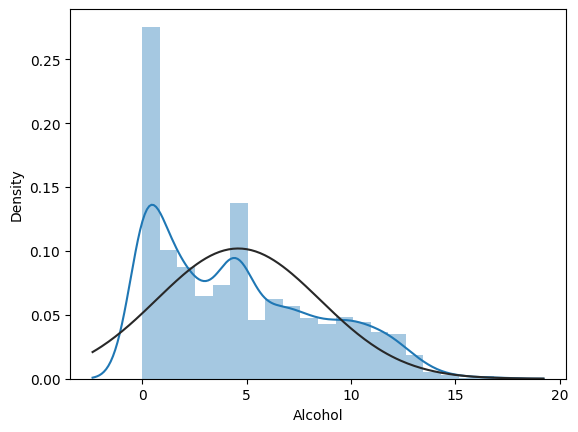

percentage expenditure 1.2435817010198258


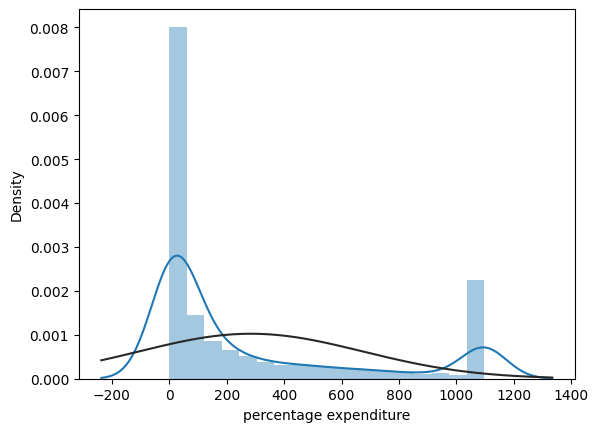

Hepatitis B -0.8183257880266698


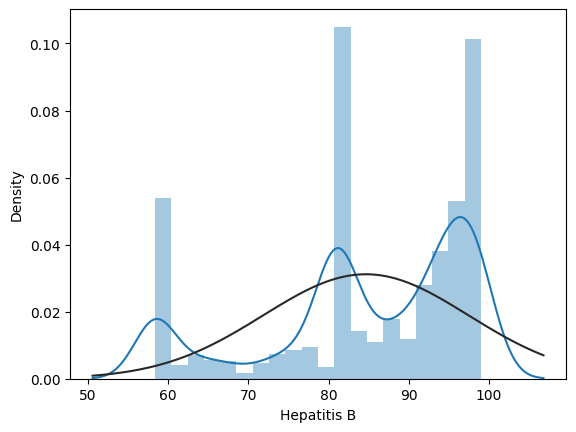

Measles  1.1845872547661371


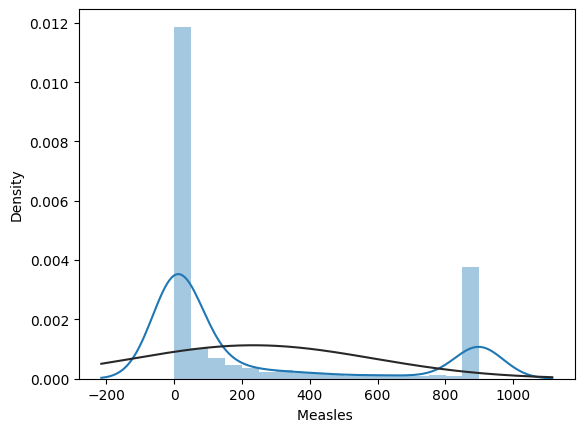

 BMI  -0.220590396710427


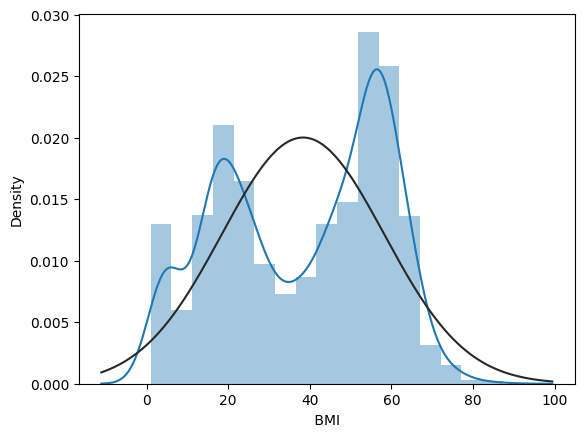

under-five deaths  9.495064656961773


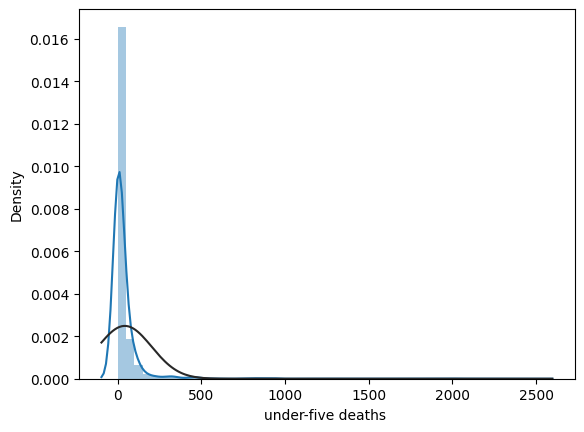

Polio -2.10486336975713


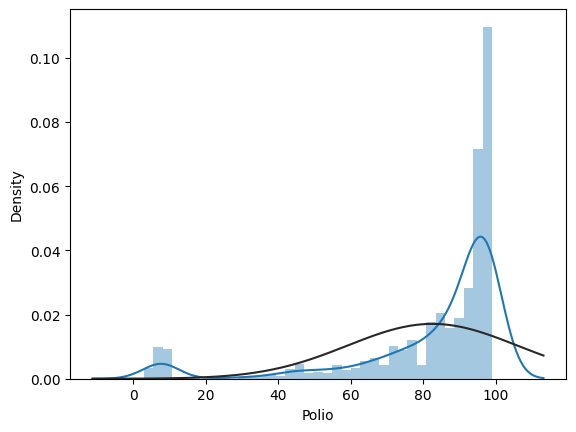

Total expenditure 0.268625312168741


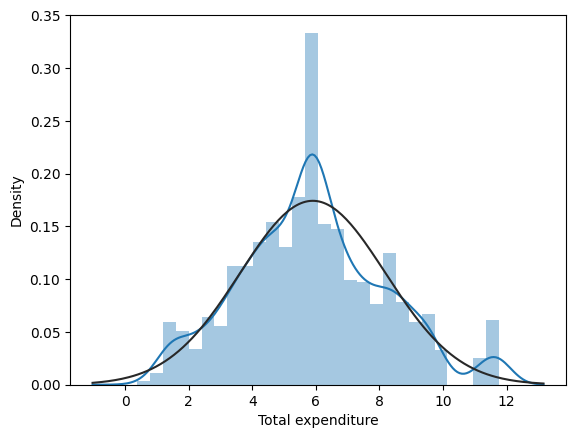

Diphtheria  -1.2570414565178323


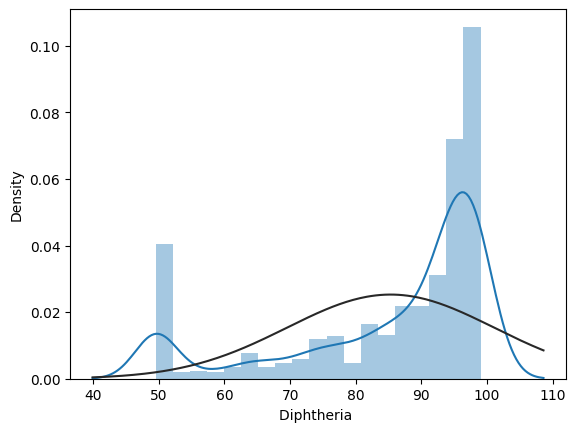

 HIV/AIDS 5.396112042126371


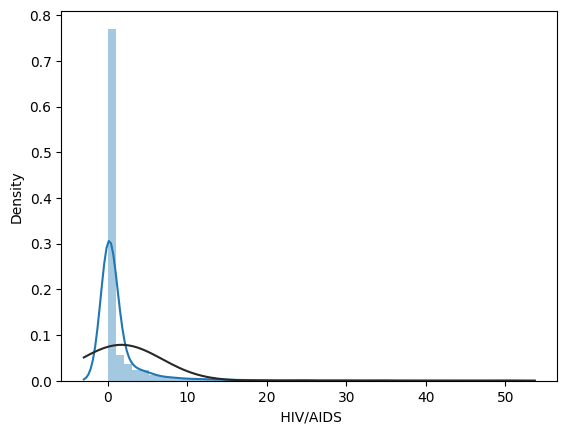

GDP 3.543755873452576


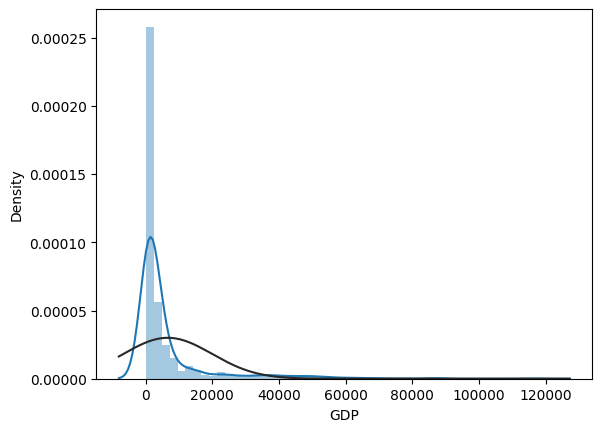

Population 17.972837117060475


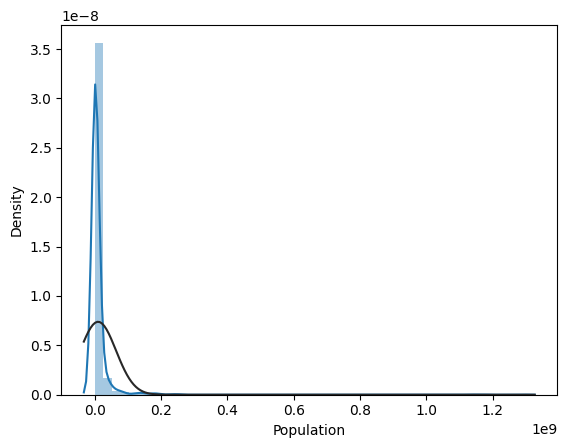

 thinness  1-19 years 1.0892036535177891


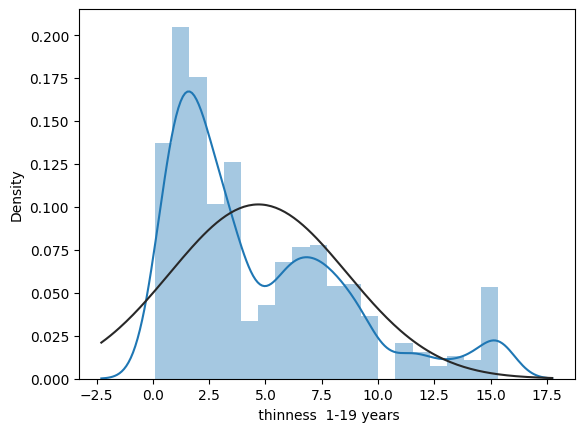

 thinness 5-9 years 1.7956937585584363


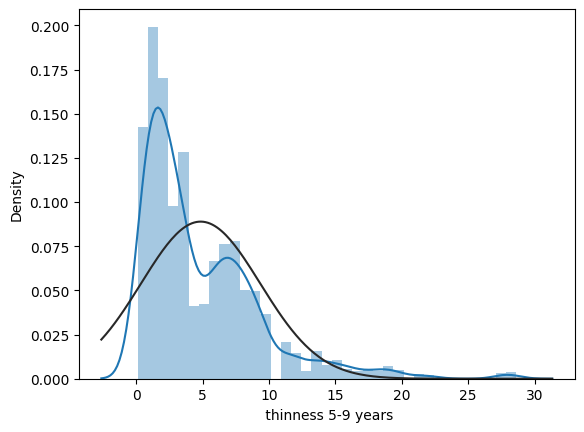

Income composition of resources -1.2125259495363097


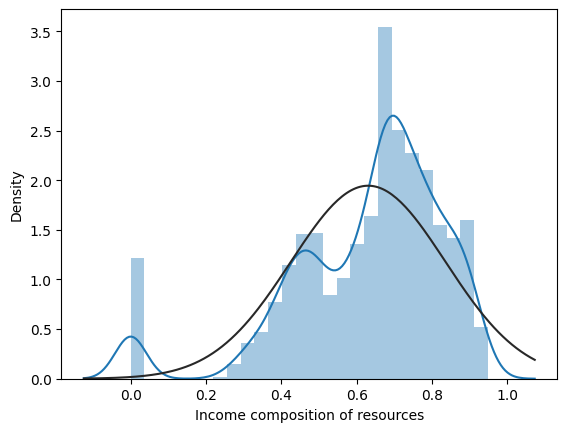

Schooling -0.6350516288526808


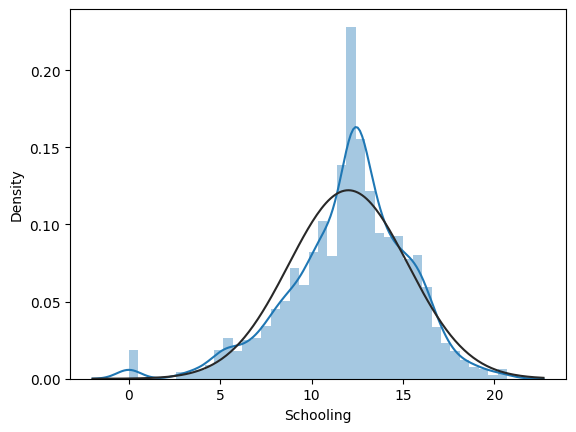

In [28]:
#skew value should nearer to 0(-0.3 to 0.3)
for i in df.columns:
  print(i, df[i].skew())
  sns.distplot(df[i],fit=norm)
  plt.show()

In [29]:
#here most of the columns has skewness

#so we can transform skewed col by boxcox lmbda method

methods = [0,0.5,-0.5,2,-2,-1] #lmbda value from this 5 we can go with which is nearer to 0
for j in df.columns:
  print(j)
  print("*******"*20)
  for i in methods:
    print(pd.DataFrame(stats.boxcox(df[j],lmbda=i)).skew())

Country
********************************************************************************************************************************************
0   NaN
dtype: float64
0   -0.556153
dtype: float64
0   NaN
dtype: float64
0    0.663464
dtype: float64
0   NaN
dtype: float64
0   NaN
dtype: float64
Year
********************************************************************************************************************************************
0   -0.009121
dtype: float64
0   -0.007765
dtype: float64
0   -0.010476
dtype: float64
0   -0.003698
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
Status
********************************************************************************************************************************************
0   NaN
dtype: float64
0   -1.718238
dtype: float64
0   NaN
dtype: float64
0   -1.718238
dtype: float64
0   NaN
dtype: float64
0   NaN
dtype: float64
Life expectancy 
****************************************************************************

In [45]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [30]:
#from boxcox method we can change some columns skewness
df["Life expectancy "] = stats.boxcox(df["Life expectancy "],lmbda= 2)
df["Adult Mortality"] = stats.boxcox(df["Adult Mortality"],lmbda= 0.5)
df["Alcohol"] = stats.boxcox(df["Alcohol"],lmbda= 0.5)
df["percentage expenditure"] = stats.boxcox(df["percentage expenditure"],lmbda= 0.5)
df["GDP"] = stats.boxcox(df["GDP"],lmbda= 0)
df[" thinness  1-19 years"] = stats.boxcox(df[" thinness  1-19 years"],lmbda= 0.5)
df["Income composition of resources"] = stats.boxcox(df["Income composition of resources"],lmbda= 2)
df["Hepatitis B"] = stats.boxcox(df["Hepatitis B"],lmbda= 2)
df["Measles "] = stats.boxcox(df["Measles "],lmbda= 0.5)
df["under-five deaths "] = stats.boxcox(df["under-five deaths "],lmbda= 0.5)
df["Polio"] = stats.boxcox(df["Polio"],lmbda= 2)
df["Diphtheria "] = stats.boxcox(df["Diphtheria "],lmbda= 2)
df[" HIV/AIDS"] = stats.boxcox(df[" HIV/AIDS"],lmbda= -2)
df["Population"] = stats.boxcox(df["Population"],lmbda= 0)
df[" thinness 5-9 years"] = stats.boxcox(df[" thinness 5-9 years"],lmbda= 0.5)
df["Schooling"] = stats.boxcox(df["Schooling"],lmbda= 2)



In [31]:
df["infant deaths"] = stats.boxcox(df["infant deaths"],lmbda= 0.5)


In [32]:
for i in df.columns:   #contolled skewness
    print(i, df[i].skew())


Country 0.03266299986942194
Year -0.0064090273593942005
Status -1.7182382093288593
Life expectancy  -0.3479280776274577
Adult Mortality -0.1745982665996074
infant deaths 3.5856722449606626
Alcohol -0.17595188283408122
percentage expenditure 0.6793974942951513
Hepatitis B -0.5946917632508324
Measles  0.8376084864969792
 BMI  -0.220590396710427
under-five deaths  3.4924442487816503
Polio -1.3498696933268077
Total expenditure 0.268625312168741
Diphtheria  -1.037889852338693
 HIV/AIDS 0.465130004056317
GDP -0.17347439470091394
Population -0.7020583448791868
 thinness  1-19 years 0.3916713544132206
 thinness 5-9 years 0.6150260519941175
Income composition of resources -0.11444151659295575
Schooling 0.41459648525163767


Kurtosis

In [33]:
from scipy.stats import kurtosis

In [61]:
 #by fisher method , value should be around 0
kurt_col = [] #kurtosis affected column
for i in df.columns:
    if kurtosis(df[i]) > 0.4 or kurtosis(df[i]) < -0.4:
        kurt_col.append(i)



17


In [63]:
kurtosis(df["Country"])

-1.2146587326166873

In [70]:
stats.boxcox(kurtosis(df["Country"]),lmbda=-1)

nan

In [ ]:
methods = [0,0.5,-0.5,2,-2,-1]
for j in kurt_col:
    print(j)
    for i in methods:
        print(stats.boxcox(kurtosis(df[j])))

statistical testing

In [35]:
pd.set_option("display.max_columns", None)

In [36]:
#correlation checking - corr value should be nearer to 1 or -1
#if its nearer to 1/-1 then there is some connectivity between those two columns

corr_matrix =df.corr()
corr_matrix

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.018634,0.010392,-0.011199,-0.046196,-0.083416,-0.035413,0.056813,0.017724,-0.010885,0.008098,0.038803,-0.009555,0.007852,-0.056115,-0.015842,0.012151,0.015718,-0.035910,-0.049522
Year,0.001342,1.000000,0.001864,0.166648,-0.015909,-0.050835,-0.068931,-0.000724,0.155914,-0.107178,0.108327,-0.056175,0.109308,0.080874,0.143660,-0.029366,0.156376,0.043172,-0.042097,-0.043481,0.205263,0.186983
Status,-0.031635,0.001864,1.000000,-0.511247,0.311396,0.261785,-0.503612,-0.371652,-0.095161,0.106104,-0.310873,0.261299,-0.254694,-0.286543,-0.272077,0.368233,-0.407351,0.028415,0.446583,0.438826,-0.560703,-0.558297
Life expectancy,-0.018634,0.166648,-0.511247,1.000000,-0.519659,-0.451322,0.381121,0.480917,0.304330,-0.332468,0.559702,-0.481529,0.536442,0.228711,0.576027,-0.725123,0.571429,-0.094197,-0.557829,-0.546086,0.796071,0.745687
Adult Mortality,0.010392,-0.015909,0.311396,-0.519659,1.000000,0.233956,-0.181756,-0.298408,-0.168638,0.165164,-0.334885,0.247944,-0.278441,-0.156743,-0.300198,0.433137,-0.312115,0.087966,0.303718,0.305356,-0.442958,-0.416809
infant deaths,-0.011199,-0.050835,0.261785,-0.451322,0.233956,1.000000,-0.260369,-0.303655,-0.301639,0.551945,-0.406012,0.996805,-0.365796,-0.192508,-0.390641,0.336423,-0.335297,0.344460,0.416373,0.477290,-0.387917,-0.418812
Alcohol,-0.046196,-0.068931,-0.503612,0.381121,-0.181756,-0.260369,1.000000,0.305940,0.104394,-0.218410,0.295936,-0.258933,0.243069,0.303952,0.263083,-0.198908,0.362142,-0.011475,-0.443611,-0.433818,0.457261,0.499322
percentage expenditure,-0.083416,-0.000724,-0.371652,0.480917,-0.298408,-0.303655,0.305940,1.000000,0.124594,-0.199104,0.319768,-0.308176,0.249751,0.164336,0.272089,-0.320244,0.722220,-0.064701,-0.336690,-0.335731,0.536162,0.525697
Hepatitis B,-0.035413,0.155914,-0.095161,0.304330,-0.168638,-0.301639,0.104394,0.124594,1.000000,-0.258287,0.196537,-0.311093,0.594826,0.052860,0.660307,-0.267940,0.188495,-0.072987,-0.086261,-0.103176,0.272484,0.255015
Measles,0.056813,-0.107178,0.106104,-0.332468,0.165164,0.551945,-0.218410,-0.199104,-0.258287,1.000000,-0.318966,0.556040,-0.302492,-0.160547,-0.324946,0.215688,-0.221451,0.242528,0.346629,0.363411,-0.252736,-0.299653


#correlation Observations:

Age:Shows weak correlations with other variables, indicating that age may not have a strong linear relationship with other factors.

Gender:Shows very weak correlations with most variables. Since gender is typically a categorical variable, correlations with continuous variables may be minimal.

Ethnicity:Like gender, ethnicity has weak correlations with most variables. This suggests little to no linear relationship with other factors in this context.

ParentalEducation:Has a small positive correlation with GPA (0.041031), indicating that higher parental education may slightly be associated with higher GPA.

StudyTimeWeekly:Shows a moderate positive correlation with GPA (0.179327), suggesting that more study time per week is associated with better GPA.

Absences:Strong negative correlation with GPA (-0.919314) and moderate positive correlation with GradeClass (0.728633). This implies that more absences are strongly associated with lower GPA and higher grade classes (which could mean lower performance or more challenging grades).

Tutoring:Shows a moderate positive correlation with GPA (0.145119), suggesting that tutoring might be associated with better GPA, though the relationship is not very strong.

ParentalSupport:Shows a moderate positive correlation with GPA (0.190774), indicating that parental support might be associated with a better GPA.

Extracurricular, Sports, Music, and Volunteering: These variables have weak to moderate correlations with GPA, suggesting limited impact on academic performance.

GradeClass:hows a strong negative correlation with GPA (-0.782835), indicating that higher grade classes are strongly associated with lower GPA.

In [28]:
#Variables like StudyTimeWeekly, Absences, and ParentalSupport could be important 

Hypothesis testing

In [37]:
for i in df.columns:
  print(i,df[i].nunique())

Country 193
Year 16
Status 2
Life expectancy  363
Adult Mortality 356
infant deaths 209
Alcohol 1075
percentage expenditure 1940
Hepatitis B 39
Measles  426
 BMI  609
under-five deaths  252
Polio 74
Total expenditure 774
Diphtheria  46
 HIV/AIDS 200
GDP 2491
Population 2279
 thinness  1-19 years 142
 thinness 5-9 years 207
Income composition of resources 625
Schooling 173


In [38]:
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>30:
    cont.append(i)
  else:
    cat.append(i)

print(cont,cat)

['Country', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] ['Year', 'Status']


In [40]:
def two_sample(d1,d2): #for two continous variable
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      m[1]+=1
    else:
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False

def chi_square(d1,d2): #for two categorical variable
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def annova(d1,d2): #assume d1 - continous, d2 - category (for 1cat and 1cont variable)
  group = df[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=df[d1][df[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    return False
  else:
    return True



In [41]:
final = {}
for i in df.columns:
  final[i] = {}
  for j in df.columns:

    if i in cont and j in cont:
      result = two_sample(df[i],df[j])

    elif i in cat and j in cat:
      result = chi_square(df[i],df[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0

In [42]:
final_df = pd.DataFrame(final)
final_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Year,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
Status,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Life expectancy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adult Mortality,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
infant deaths,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
Alcohol,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
percentage expenditure,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Hepatitis B,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
Measles,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


<Axes: >

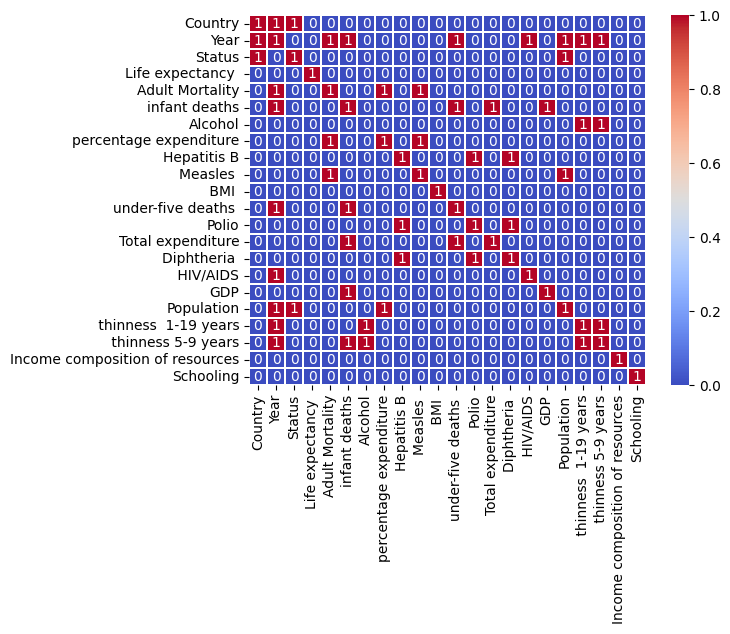

In [43]:
sns.heatmap(final_df,cmap ="coolwarm",linewidths=0.2,annot=True)

Hypothesis testing obrevations

from this heatmap we can cleary see studytimeweekly column has strong connection between most of the variables

rest all columns has no strong relationship with others

In [44]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,2015,1.0,2112.000,30.434549,13.748016,-1.8,14.885452,2112.0,58.020830,19.1,16.220867,17.5,8.16,2112.0,-49.5,6.370345,17.334091,5.835815,6.318654,-0.385279,50.505
1,0.0,2014,1.0,1793.505,30.924155,14.000000,-1.8,15.149179,1921.5,42.362146,18.6,16.547237,1681.5,8.18,1921.5,-49.5,6.417870,12.699494,5.835815,6.366600,-0.386712,49.500
2,0.0,2013,1.0,1793.505,30.741411,14.248077,-1.8,15.113649,2047.5,39.472883,18.1,16.867962,1921.5,8.13,2047.5,-49.5,6.448486,17.272826,5.835815,6.414274,-0.389550,48.505
3,0.0,2012,1.0,1769.625,30.984845,14.613248,-1.8,15.684368,2244.0,58.020830,17.6,17.287302,2244.0,8.52,2244.0,-49.5,6.507217,15.123021,5.835815,6.485281,-0.392815,47.520
4,0.0,2011,1.0,1751.820,31.166248,14.852300,-1.8,3.328080,2311.5,58.020830,17.2,17.697716,2311.5,7.87,2311.5,-49.5,4.151626,14.906964,5.835815,6.532292,-0.396942,44.625


In [46]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [47]:
x = df.drop("Life expectancy ",axis=1)
y =df["Life expectancy "]

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2)

In [52]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor().fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

19252.979769074125
82.3157036588249
0.9509745740926188


In [54]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor().fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

13175.863622461782
73.5250746504513
0.9657446695172536


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor().fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

In [63]:
for i in list([15,16]):
    for j in range(16,25):
        model2 = RandomForestRegressor(n_estimators=i,max_depth=j).fit(x_train,y_train)
        y_pred=model2.predict(x_test)
        print("*****"*5)
        print(i,j)
        print(mean_squared_error(y_test,y_pred))
        print(mean_absolute_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))

*************************
15 16
15412.436694140926
80.00024819549233
0.9599299045868872
*************************
15 17
14009.310358498045
77.64951597559882
0.9635778291339016
*************************
15 18
14008.40609635937
77.20653273547441
0.9635801800840397
*************************
15 19
14187.717308106285
75.46059229913944
0.9631139969939855
*************************
15 20
14360.731118934811
76.59048198369493
0.9626641862310761
*************************
15 21
14323.482934431531
77.5759783900081
0.9627610260972589
*************************
15 22
13670.852308943615
76.01979368928852
0.9644577708723898
*************************
15 23
15065.618788040825
78.42350204393308
0.9608315807374008
*************************
15 24
15012.215462333577
79.62406263126498
0.9609704216227801
*************************
16 16
13883.066082573252
73.74503909462379
0.963906045903388
*************************
16 17
14587.387677689467
77.3800825682583
0.962074912119815
*************************
16 18
15730